In [65]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

# M-H采样

In [53]:
## 概率密度函数 π
p_pdf = lambda x: (norm.pdf(x,loc=30,scale=10)+norm.pdf(x,loc=80,scale=20))/2
# 定义域【-20,170】

In [ ]:
## 任意概率密度转移矩阵 Q 
# Q选择定义域上的均匀分布，q=lambda i: 1/(170+20)  所以Q是对称的。

In [57]:
## 初始化x0：
X = [np.random.random()*190-20] ## 用定义域[-20,170]的均匀分布生成初始值
## 采样
for _ in range(100000):
    x_next = np.random.random()*190-20 ## Q是定义域上的均匀分布，根据Q采样x_next
    alpha = min(p_pdf(x_next)/p_pdf(X[-1]),1) ## 计算alpha，Q是对称的，所以可约去Q
    X.append(x_next if alpha>np.random.uniform() else x) ## 使用一个随机数判断是否接受

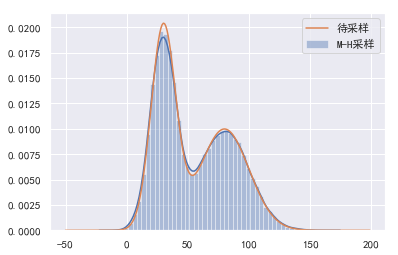

In [66]:
sns.distplot(X[-90000:],label='M-H采样')
sns.lineplot(np.arange(-50,200),p_pdf(np.arange(-50,200)),label='待采样')

# Gibbs采样

In [120]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

avg1,avg2 = 0.5,-0.2
std1,std2 = 1.5,0.7
ro = 0.5

In [122]:
## 概率密度函数 π
p_pdf = lambda x: multivariate_normal([avg1, avg2], [[std1*std1, ro*std1*std2], [ro*std1*std2, std2*std2]]).pdf(x)
# 定义域【-5,5】
X = np.random.uniform([-5, -5], [5,5], [10000, 2])
z = p_pdf(X)

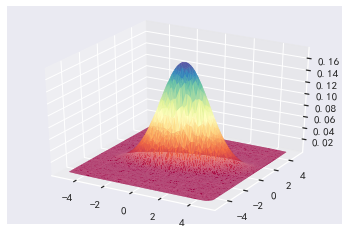

In [123]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], z,cmap=plt.cm.Spectral,linewidth=0)

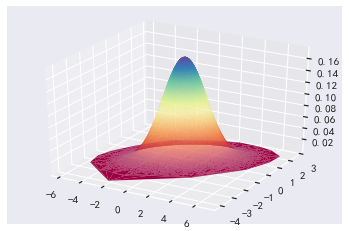

In [128]:
## 随机初始值
X = np.random.uniform([-5, -5], [5,5], [1, 2]).tolist()
## 采样
scale1,scale2 = np.sqrt((1-ro*ro)*std1*std1),np.sqrt((1-ro*ro)*std2*std2)
loc1,loc2 = lambda x:avg1+ro*std1/std2*(x-avg2), lambda x:avg2+ro*std2/std1*(x-avg1)
for _ in range(100000):
    x1_next = norm.rvs(loc=loc1(X[-1][1]), scale = scale1) ## x2-->x1_new
    x2_next = norm.rvs(loc=loc2(x1_next), scale = scale2) ## x1_new-->x2_new
    X.append([x1_next,x2_next])

## 绘图
X = np.array(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], p_pdf(X),cmap=plt.cm.Spectral,linewidth=0)

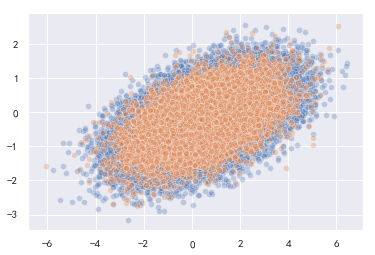

In [131]:
sns.scatterplot(X[-50000:,0],X[-50000:,1],alpha=.3)
test = multivariate_normal([avg1, avg2], [[std1*std1, ro*std1*std2], [ro*std1*std2, std2*std2]]).rvs(10000)
sns.scatterplot(test[:,0],test[:,1],alpha=.3)